In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import seaborn as sns
import string
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import random
from sklearn.ensemble import VotingClassifier

In [39]:
df = pd.read_csv("/content/drive/MyDrive/spam or ham/spam.csv",encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [43]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [44]:
df = df.rename(columns={"v1":"target","v2":"text"})

In [45]:
column_names = ["text","target"]
df = df.reindex(columns=column_names)

In [40]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

<h2 align="center"> EDA ANALYSIS </h2>

In [ ]:
counter = dict(df["target"].value_counts())
counter

{'ham': 4825, 'spam': 747}

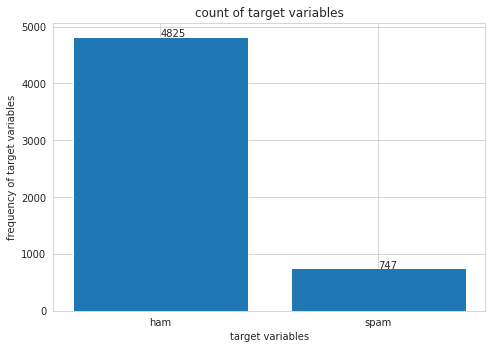

In [ ]:
product_name = list(counter.keys())
product_freq = list(counter.values())
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(product_name, product_freq)
for i in range(len(product_freq)):
    plt.text(i,product_freq[i],product_freq[i])
plt.xlabel("target variables")
plt.ylabel("frequency of target variables")
plt.title("count of target variables")
plt.show()

In [46]:
df["length_sentences"] = df["text"].apply(len)

In [ ]:
df["length_sentences"].min()

2

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



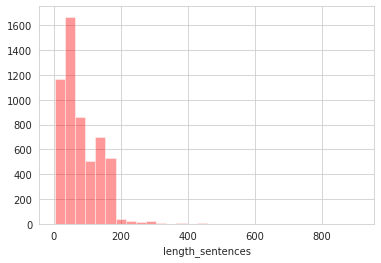

In [ ]:
# set the background style of the plot
sns.set_style('whitegrid')
sns.distplot(df['length_sentences'], kde = False, color ='red', bins = 30)


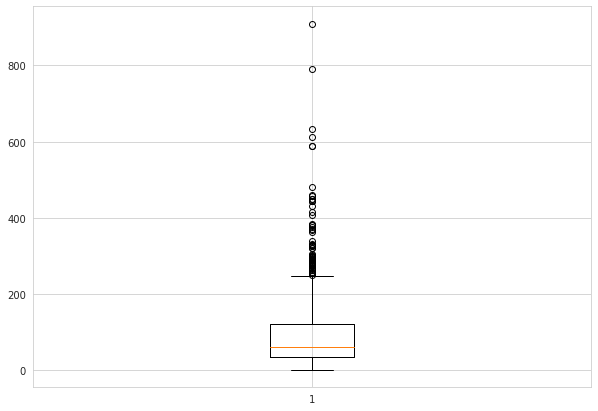

In [ ]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df["length_sentences"])
 
# show plot
plt.show()

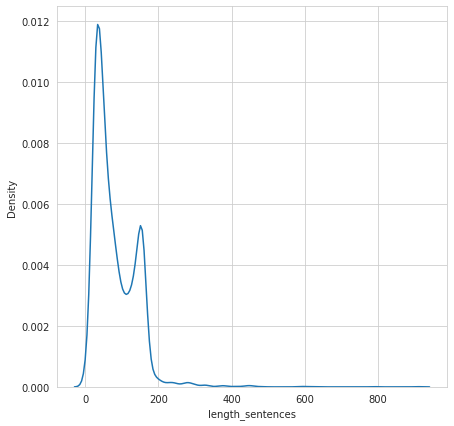

In [ ]:
fig = plt.figure(figsize =(7, 7))
sns.kdeplot(data=df["length_sentences"])

In [ ]:
length_array = df["length_sentences"].values
print("25 th percentile",np.percentile(length_array, 25))
print("50 th percentile",np.percentile(length_array, 50))
print("75 th percentile",np.percentile(length_array, 75))
print("90 th percentile",np.percentile(length_array, 90))

25 th percentile 36.0
50 th percentile 61.0
75 th percentile 121.0
90 th percentile 156.0


In [ ]:
Q1 = np.percentile(length_array, 25)
Q3 = np.percentile(length_array, 75)
IQR = Q3-Q1
print("inter quartile range")
print(IQR)
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print("upper and lower limits are")
print(upper_limit," ",lower_limit)

inter quartile range
85.0
upper and lower limits are
248.5   -91.5


In [ ]:
## any sentence which is above 250 is consider as outlier

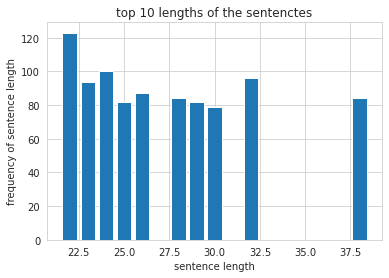

In [ ]:
counter_length = dict(df["length_sentences"].value_counts())

lengths_keys = list(counter_length.keys())
lengths_keys = lengths_keys[0:10]
lengths_values = list(counter_length.values())
lengths_values = lengths_values[0:10]
plt.bar(lengths_keys,lengths_values)
plt.xlabel("sentence length")
plt.ylabel("frequency of sentence length")
plt.title("top 10 lengths of the sentenctes")
plt.show()

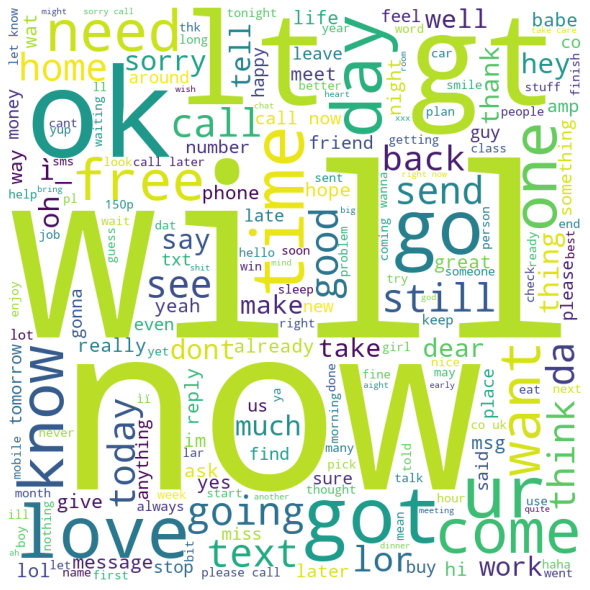

In [ ]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
# df = pd.read_csv(r"spam.csv", encoding ="latin-1")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.v2:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


<h2> preprocessing the data </h2>

In [47]:
df = df[df["length_sentences"] <=210]

In [48]:
import string
def process(text):
    # lowercase it
    text = text.lower()
    
    # remove punctuation
#     print(string.punctuation)
    text = ''.join([t for t in text if t not in string.punctuation])
    
    # remove stopwords
    text = [t for t in text.split() if t not in stopwords]
    
    # stemming
    st = Stemmer()
    text = [st.stem(t) for t in text]
    
    # return token list
    output = ""
    for i in text:
        output = output + i + " "
    return output

In [49]:
%%time
df["clean_text"] = df["text"].apply(process)

CPU times: user 1.25 s, sys: 0 ns, total: 1.25 s
Wall time: 1.26 s


In [50]:
df.shape

(5474, 4)

In [51]:
df.drop(["text"],axis=1,inplace=True)
column_names = ["clean_text","length_sentences","target"]
df = df.reindex(columns=column_names)


In [55]:
df.head(5)

,clean_text,length_sentences,target
0,go jurong point crazi avail bugi n great world...,111,ham
1,ok lar joke wif u oni,29,ham
2,free entri 2 wkli comp win fa cup final tkt 21...,155,spam
3,u dun say earli hor u c alreadi say,49,ham
4,nah dont think goe usf live around though,61,ham


In [53]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [54]:
X = df[["clean_text","length_sentences"]]
y = df["target"]

In [58]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [59]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4))
vectorizer.fit(X_train["clean_text"].values)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=10, ngram_range=(1, 4), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [60]:
X_clean_text_train_tfidf = vectorizer.transform(X_train["clean_text"].values)
X_clean_text_train_tfidf.shape

(3667, 642)

In [61]:
X_clean_text_train_tfidf[0]

<1x642 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [62]:
X_clean_text_train_tfidf.shape

(3667, 642)

In [63]:
X_clean_text_test_tfidf = vectorizer.transform(X_test["clean_text"].values)
X_clean_text_test_tfidf.shape

(1807, 642)

In [64]:
normalizer = Normalizer()
normalizer.fit(X_train["length_sentences"].values.reshape(1,-1)) 

Normalizer(copy=True, norm='l2')

In [65]:
X_train_length_sentence_normalized = normalizer.transform(X_train["length_sentences"].values.reshape(1,-1))
X_train_length_sentence_normalized.shape

(1, 3667)

In [66]:
X_train_length_sentence_normalized = X_train_length_sentence_normalized.reshape(-1,1)
X_train_length_sentence_normalized.shape

(3667, 1)

In [67]:
X_test_length_sentence_normalized = normalizer.transform(X_test["length_sentences"].values.reshape(1,-1))
X_test_length_sentence_normalized.shape

(1, 1807)

In [68]:
X_test_length_sentence_normalized = X_test_length_sentence_normalized.reshape(-1,1)
X_test_length_sentence_normalized.shape

(1807, 1)

In [69]:
X_tr = hstack((X_clean_text_train_tfidf,X_train_length_sentence_normalized)).toarray()
X_te = hstack((X_clean_text_test_tfidf,X_test_length_sentence_normalized)).toarray()

In [70]:
X_tr.shape

(3667, 643)

In [71]:
le=LabelEncoder()
le.fit(y_train.values)

LabelEncoder()

In [72]:
y_tr = le.transform(y_train.values)
y_te = le.transform(y_test.values)

In [73]:
print(y_tr.shape,y_te.shape)

(3667,) (1807,)


In [74]:
oversample = SMOTE()
X_tr, y_tr = oversample.fit_resample(X_tr, y_tr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [82]:
oversample = SMOTE()
X_te, y_te = oversample.fit_resample(X_te, y_te)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



<h2 align="center"> applying ensmbelle technique on multinomial navie bayes classifer </h2>

In [75]:
random.seed(0)
clf = MultinomialNB()
parameters = {  
'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
}  
grid_search= GridSearchCV(clf, parameters,cv=3,scoring="f1",return_train_score = True,verbose=2)
grid_search.fit(X_tr,y_tr)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=0.1 .......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 1e-05)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=2)

In [76]:
grid_search.best_params_

{'alpha': 1e-05}

In [77]:

bagg_nb = BaggingClassifier(MultinomialNB(alpha=0.1))
bagg_nb.fit(X_tr,y_tr)

BaggingClassifier(base_estimator=MultinomialNB(alpha=0.1, class_prior=None,
                                               fit_prior=True),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [78]:
y_pred_train = bagg_nb.predict(X_tr)
y_pred_train

array([0, 0, 1, ..., 1, 1, 1])

In [79]:
print("train_f1_score is ",f1_score(y_tr, y_pred_train, average="macro"))

train_f1_score is  0.9617933582875042


In [83]:
y_pred = bagg_nb.predict(X_te)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [84]:
print("test_f1_score is ",f1_score(y_te, y_pred, average="macro"))

test_f1_score is  0.9497067645619609


In [85]:
string_ = "hello world !"
length = len(string_)
string_ = process(string_)
string_ =  np.array([string_])
length = np.array([length]).reshape(1, -1)
length =  normalizer.transform(length)
string_tfidf = vectorizer.transform(string_)
X_ = hstack((string_tfidf,length)).toarray()
bagg_nb.predict(X_)

array([0])

<h2 align="center"> apply ensemble learning models </h2>

In [86]:
%%time
random.seed(0)
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)
#fit model to training data
knn_gs.fit(X_tr, y_tr)

CPU times: user 17min 37s, sys: 1.01 s, total: 17min 38s
Wall time: 17min 33s


In [87]:
knn_best = knn_gs.best_params_
knn_best

{'n_neighbors': 2}

In [88]:
knn = KNeighborsClassifier(n_neighbors=2)

In [89]:
%%time
#create a new random forest classifier
random.seed(0)
rf = RandomForestClassifier()

#create a dictionary of all values we want to test for n_estimators
params_rf = {"n_estimators": [50, 100, 200]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=3,verbose=2)
#fit model to training data
rf_gs.fit(X_tr, y_tr)
rf_best = rf_gs.best_estimator_
rf_best

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=50, total=   1.1s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] .................................. n_estimators=50, total=   1.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   1.0s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   1.9s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   2.0s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   2.1s
[CV] n_estimators=200 ................................................
[CV] ................................. n_estimators=200, total=   3.7s
[CV] n_estimators=200 ................................................
[CV] ................................. n_estimators=200, total=   4.0s
[CV] n_estimators=200 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   20.8s finished


CPU times: user 26.9 s, sys: 58.7 ms, total: 26.9 s
Wall time: 26.9 s


In [90]:
rf_best= rf_gs.best_params_
rf_best

{'n_estimators': 200}

In [91]:
rf = RandomForestClassifier(n_estimators=200)

In [92]:
clf = LogisticRegression()
params = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
#use gridsearch to test all values for n_estimators
lg = GridSearchCV(clf, params, cv=3,verbose=2)
#fit model to training data
lg.fit(X_tr, y_tr)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.001, penalty=l1 .............................................
[CV] .............................. C=0.001, penalty=l1, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] .............................. C=0.001, penalty=l1, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] .............................. C=0.001, penalty=l1, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] .............................. C=0.001, penalty=l2, total=   0.1s
[CV] C=0.001, penalty=l2 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................. C=0.001, penalty=l2, total=   0.1s
[CV] C=0.001, penalty=l2 .............................................
[CV] .............................. C=0.001, penalty=l2, total=   0.1s
[CV] C=0.009, penalty=l1 .............................................
[CV] .............................. C=0.009, penalty=l1, total=   0.0s
[CV] C=0.009, penalty=l1 .............................................
[CV] .............................. C=0.009, penalty=l1, total=   0.0s
[CV] C=0.009, penalty=l1 .............................................
[CV] .............................. C=0.009, penalty=l1, total=   0.0s
[CV] C=0.009, penalty=l2 .............................................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.




[CV] .............................. C=0.009, penalty=l2, total=   0.1s
[CV] C=0.009, penalty=l2 .............................................
[CV] .............................. C=0.009, penalty=l2, total=   0.1s
[CV] C=0.009, penalty=l2 .............................................
[CV] .............................. C=0.009, penalty=l2, total=   0.1s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.




[CV] ............................... C=0.01, penalty=l1, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ............................... C=0.01, penalty=l2, total=   0.1s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ............................... C=0.01, penalty=l2, total=   0.1s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ............................... C=0.01, penalty=l2, total=   0.1s
[CV] C=0.09, penalty=l1 ..............................................
[CV] ............................... C=0.09, penalty=l1, total=   0.0s
[CV] C=0.09, penalty=l1 ..............................................
[CV] ............................... C=0.09, penalty=l1, total=   0.0s
[CV] C=0.09, penalty=l1 ..............................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.




[CV] ............................... C=0.09, penalty=l2, total=   0.1s
[CV] C=0.09, penalty=l2 ..............................................
[CV] ............................... C=0.09, penalty=l2, total=   0.1s
[CV] C=1, penalty=l1 .................................................
[CV] .................................. C=1, penalty=l1, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] .................................. C=1, penalty=l1, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] .................................. C=1, penalty=l1, total=   0.0s
[CV] C=1, penalty=l2 .................................................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.




[CV] .................................. C=1, penalty=l2, total=   0.1s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   0.2s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   0.1s
[CV] C=5, penalty=l1 .................................................
[CV] .................................. C=5, penalty=l1, total=   0.0s
[CV] C=5, penalty=l1 .................................................
[CV] .................................. C=5, penalty=l1, total=   0.0s
[CV] C=5, penalty=l1 .................................................
[CV] .................................. C=5, penalty=l1, total=   0.0s
[CV] C=5, penalty=l2 .................................................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.




[CV] .................................. C=5, penalty=l2, total=   0.3s
[CV] C=5, penalty=l2 .................................................
[CV] .................................. C=5, penalty=l2, total=   0.2s
[CV] C=5, penalty=l2 .................................................
[CV] .................................. C=5, penalty=l2, total=   0.3s
[CV] C=10, penalty=l1 ................................................
[CV] ................................. C=10, penalty=l1, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ................................. C=10, penalty=l1, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ................................. C=10, penalty=l1, total=   0.0s
[CV] C=10, penalty=l2 ................................................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.




[CV] ................................. C=10, penalty=l2, total=   0.3s
[CV] C=10, penalty=l2 ................................................
[CV] ................................. C=10, penalty=l2, total=   0.3s
[CV] C=10, penalty=l2 ................................................
[CV] ................................. C=10, penalty=l2, total=   0.3s
[CV] C=25, penalty=l1 ................................................
[CV] ................................. C=25, penalty=l1, total=   0.0s
[CV] C=25, penalty=l1 ................................................
[CV] ................................. C=25, penalty=l1, total=   0.0s
[CV] C=25, penalty=l1 ................................................
[CV] ................................. C=25, penalty=l1, total=   0.0s
[CV] C=25, penalty=l2 ................................................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.




[CV] ................................. C=25, penalty=l2, total=   0.4s
[CV] C=25, penalty=l2 ................................................
[CV] ................................. C=25, penalty=l2, total=   0.4s
[CV] C=25, penalty=l2 ................................................
[CV] ................................. C=25, penalty=l2, total=   0.5s


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    4.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [93]:
lg_best = lg.best_params_
lg_best

{'C': 25, 'penalty': 'l2'}

In [94]:
lg = LogisticRegression(penalty="l2",C=25)
lg

LogisticRegression(C=25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
#create a dictionary of our models
estimators=[("knn",knn), ("rfc", rf), ("lr", lg)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting="hard")
ensemble.fit(X_tr,y_tr)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=2,
                                                   p=2, weights='uniform')),
                             ('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=Non

In [96]:
ensemble

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=2,
                                                   p=2, weights='uniform')),
                             ('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=Non

In [97]:
y_pred_train = ensemble.predict(X_tr)
print("train_f1_score is ",f1_score(y_tr, y_pred_train, average="macro"))

train_f1_score is  0.9988948518235781


In [98]:
y_pred_test = ensemble.predict(X_te)
print("test_f1_score is ",f1_score(y_te, y_pred_test, average="macro"))

test_f1_score is  0.9660364779548896


In [99]:
def predict_(text):
    length = len(text)
    text = process(text)
    text =  np.array([text])
    length = np.array([length]).reshape(1, -1)
    length =  normalizer.transform(length)
    string_tfidf = vectorizer.transform(text)
    X_ = hstack((string_tfidf,length)).toarray()
    target_predicted = ensemble.predict(X_)
    if target_predicted[0] == 0:
        return "ham"
    else:
        return "spam"
    
    

In [100]:
%%time
output = predict_("hello world")
print(output)

ham
CPU times: user 38.2 ms, sys: 0 ns, total: 38.2 ms
Wall time: 39.4 ms
